## LAB 2

2.1) Create a download script download_nba_all_elo.py to download the data.

In [1]:
pwd()

'C:\\Users\\manth\\Documents\\Master Program\\Business Intelligence\\Labs\\Lab2'

In [3]:
import requests

In [12]:
#get the data from a download link
download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-elo/nbaallelo.csv"
target_csv_path = "nba_all_elo.csv"

In [13]:
response = requests.get(download_url)

In [14]:
response.raise_for_status() #check that the request was successful

In [15]:
#save the file nba_all_elo.csv in your current working directory.
with open(target_csv_path, "wb") as f:
    f.write(response.content)
print("download ready")

download ready


2.2) Now create a new script lab2_NBA in which you will use the Pandas Python library to take a look at your data

In [2]:
#importing Pandas in Python with the pd alias

import pandas as pd
import numpy as np

In [3]:
#read in the dataset and store it as a DataFrame object in the variable nba When you copy the file path, 
#if you get the FileNotFoundError: [Errno 2] then just flip the backslash to a forward slash and voila it works!

nba = pd.read_csv("C:\\Users\\manth\\Documents\\Master Program\\Business Intelligence\\Labs\\Lab2\\nba_all_elo.csv")

In [4]:
type(nba)

pandas.core.frame.DataFrame

2.3) Let’s see how much data is actually in nba (report these findings):

In [6]:
#len() determines the number of rows (observations) in a dataset
len(nba)

126314

In [7]:
#.shape determines dimensionality the result is a tuple containing number of rows and columns
nba.shape

(126314, 23)

In [8]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [9]:
#configure Pandas to display all 23 columns
pd.set_option("display.max.columns", None)
#show only two decimal places
pd.set_option("display.precision", 2)

In [10]:
nba.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [11]:
#display last five rows
nba.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


Question.1 (report your answer): Display the first 3 rows of your dataset. Remember that the default of nba.head() shows the first 5 rows.

In [8]:
nba.head(3)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN


## Task3: Get to Know Your Data.

In Task2 you imported a CSV file and had a quick peek at the contents of the dataset. So far, you’ve only seen the size of your dataset and its first and last few rows. Next, you’ll learn how to examine your data more systematically.

3.1) Discover the different data types your dataset contains.

In [13]:
#you can put anything into a list, but the columns of a DataFrame contain values of a specific data type. 
#by comparing Pandas and Python data structures, you’ll see that this behavior makes Pandas much faster! 
#display all columns and their data types with .info() 

nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

From the output you will see that this dataset contains int64, float64 and object. Pandas uses NumPy library to work with these types.


The object type is special, according to the Pandas Cookbook, the object data type is “a catch-all for columns that Pandas doesn’t recognize as any other specific type.” In practice, it often means that all of the values in the column are strings. Although you can store arbitrary Python objects in the object data type, strange values in an object column can harm Pandas’ performance and its interoperability with other libraries. You will see how to deal with this later in the tutorial.

3.2) Showing basic statistics.


Get an idea of the values each column contains

In [14]:
#get an idea of the values each column contains 

nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


The output shows basic descriptive statistics for all numeric columns.


.describe() only analyses numeric columns by default, but you can provide other data types if you use the include parameter

In [15]:
nba.describe(include=np.object)

,game_id,lg_id,date_game,team_id,fran_id,opp_id,opp_fran,game_location,game_result,notes
count,126314,126314,126314,126314,126314,126314,126314,126314,126314,5424
unique,63157,2,12426,104,53,104,53,3,2,231
top,197101290BOS,NBA,1/2/2009,BOS,Lakers,BOS,Lakers,H,L,at New York NY
freq,2,118016,30,5997,6024,5997,6024,63138,63157,440


Here .describe() won't calculate a mean or a standard deviation for object columns since they mostly include text strings. It just displays descriptive statistics.

Question.2 (report your answer): Take a look at the team_id and fran_id (franchise) columns, what observations can you make at this point (i.e. do you see anything strange here)? Write your initial observation then carry on with section 3.3 to be able to answer it by exploring your dataset.

A) It looks like the data set contains 104 unique team ids but only 53 unique franchise ids. And the most played team is BOS and franchise is lakers. This is may be beacuse there may be any another team under the franchise. Usually an frashise could have multiple teams under them or they may be any change of the name for the team. Lets see the data and get conclude on this.

3.3) Exploring the dataset


Exploratory data analysis helps you answer questions about your dataset, for example, exploring how often specific values occur in a column. Let’s take a look at the two columns team_id and fran_id:

In [16]:
nba["team_id"].value_counts()
#nba["fran_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
DTF      60
PIT      60
INJ      60
TRH      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [17]:
nba["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Waterloo     

It seems that a team named "Lakers" played 6024 games, but only 5078 of those were played by the Los Angeles Lakers. To find out who the other “Lakers” team is execute the following line of code:

In [18]:
nba.loc[nba["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

pandas.DataFrame.loc is used to access a group of rows and columns by label(s) or a boolean array.

The output shows that the Minneapolis Lakers ("MNL") played the other 946 games.


Let’s find out when they played those games:

In [19]:
#Find out when they played those games 
nba.loc[nba["team_id"] == "MNL", "date_game"].min()

'1/1/1949'

In [20]:
nba.loc[nba["team_id"] == "MNL", "date_game"].max()

'4/9/1959'

In [21]:
nba.loc[nba["team_id"] == "MNL", "date_game"].agg(("min", "max")) #aggregate the two functions

min    1/1/1949
max    4/9/1959
Name: date_game, dtype: object

Question.3 (report your answer): Find out how many wins and losses the Minneapolis Lakers had, also find how many points they scored during the matches contained in the dataset.

In [22]:
nba.loc[nba["team_id"] == "MNL", "game_result"].value_counts()

W    524
L    422
Name: game_result, dtype: int64

In [23]:
nba.loc[nba["team_id"] == "MNL", "pts"].sum()

88229

Question.4 (report your answer): Now you understand why the Boston Celtics team "BOS" played the most games in the dataset, find out how many points the Boston Celtics have scored during all matches contained in this dataset.

In [24]:
nba.loc[nba["team_id"] == "BOS", "game_result"].value_counts()

W    3517
L    2480
Name: game_result, dtype: int64

In [10]:
nba.loc[nba["team_id"] == "BOS", "pts"].sum()

626484

Question.5 (report your answer): After having explored your dataset, explain your observations from Question.2 in a structured way.

In [26]:
nba.loc[nba["team_id"] == "BOS", "fran_id"].value_counts()

Celtics    5997
Name: fran_id, dtype: int64

A) We see that the Lakers Franchise has the highest played matches but under lakers we had two different teams one was MNL which was playing during the years 1949-1959 they later they have new team playing under the frachise which is LAL. So according to the most player matches count BOS stands at the first.

## Task4: Data access methods (loc and iloc):

Check Pandas official docs for these two functions.


With data access methods like .loc and .iloc, you can select just the right subset of your DataFrame to help you answer questions about your dataset.
.loc uses the label and .iloc the positional index

In [18]:
nba.index

RangeIndex(start=0, stop=126314, step=1)

In [19]:
nba.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

In [22]:
"notes" in nba.keys()

True

#### Question.6 (report your answer):

6.1) Use a data access method to display the 4th row from the bottom of the nba dataset.

In [46]:
nba.iloc[[-4]]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN


6.2) Use a data access method to display the 2nd row from the top of the nba dataset.

In [5]:
nba.iloc[[1]]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.70517,TRH,Huskies,66,1300.0,1293.2767,A,W,0.359935,NaN


In [54]:
nba.loc[[3]]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.0,1309.65,A,L,0.37,NaN


The second row from the top would be the row which has the index value 1.


6.3) Access all games between the labels 5555 and 5559, you only want to see the names of teams and the scores.

In [32]:
nba.iloc[5555:5559]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
5555,2778,195312310FTW,NBA,0,1954,12/31/1953,30,0,FTW,Pistons,83,1565.75,1572.41,47.12,PHW,Warriors,56,1421.23,1414.57,H,W,0.80,at Indianapolis IN
5556,2779,195312310NYK,NBA,1,1954,12/31/1953,33,0,BOS,Celtics,95,1526.33,1553.75,45.19,NYK,Knicks,74,1580.91,1553.50,A,W,0.29,NaN
5557,2779,195312310NYK,NBA,0,1954,12/31/1953,30,0,NYK,Knicks,74,1580.91,1553.50,45.16,BOS,Celtics,95,1526.33,1553.75,H,L,0.71,NaN
5558,2780,195312310SYR,NBA,1,1954,12/31/1953,29,0,ROC,Kings,81,1591.52,1586.87,48.59,SYR,Sixers,86,1593.86,1598.50,A,L,0.36,NaN


In [33]:
nba.loc[5555:5559, ["fran_id", "opp_fran", "pts", "opp_pts"]]

,fran_id,opp_fran,pts,opp_pts
5555,Pistons,Warriors,83,56
5556,Celtics,Knicks,95,74
5557,Knicks,Celtics,74,95
5558,Kings,Sixers,81,86
5559,Sixers,Kings,86,81


## Task5: Querying the Dataset

You have seen how to access subsets of a huge dataset based on its indices, now you will select rows based on the values in your dataset’s columns to query your data.

In [44]:
#create a new DataFrame that contains only games played after 2010

current_decade = nba[nba["year_id"] > 2010] 
current_decade.shape

(12658, 23)

All the columns are still there but current_decade only consists of rows where the value in the year_id column is greater than 2010.

Question.7 (report your answer): Create a new DataFrame which consists of the games played between 2000 and 2009.

In [63]:
games_00_09 = nba[(nba["year_id"]>=2000) & (nba["year_id"]<=2009)]

In [64]:
games_00_09

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
85222,42612,199911020CHH,NBA,0,2000,11/2/1999,1,0,CHH,Pelicans,100,1547.16,1555.44,46.87,ORL,Magic,86,1539.53,1531.24,H,W,0.65,NaN
85223,42612,199911020CHH,NBA,1,2000,11/2/1999,1,0,ORL,Magic,86,1539.53,1531.24,44.36,CHH,Pelicans,100,1547.16,1555.44,A,L,0.35,NaN
85224,42613,199911020DAL,NBA,1,2000,11/2/1999,1,0,GSW,Warriors,96,1432.48,1425.06,33.32,DAL,Mavericks,108,1442.51,1449.93,A,L,0.35,NaN
85225,42613,199911020DAL,NBA,0,2000,11/2/1999,1,0,DAL,Mavericks,108,1442.51,1449.93,35.87,GSW,Warriors,96,1432.48,1425.06,H,W,0.65,NaN
85226,42614,199911020DEN,NBA,1,2000,11/2/1999,1,0,PHO,Suns,102,1540.82,1530.94,44.33,DEN,Nuggets,107,1337.71,1347.59,A,L,0.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111027,55514,200906090ORL,NBA,1,2009,6/9/2009,103,1,LAL,Lakers,104,1773.23,1767.29,65.19,ORL,Magic,108,1690.04,1695.98,A,L,0.48,NaN
111028,55515,200906110ORL,NBA,1,2009,6/11/2009,104,1,LAL,Lakers,99,1767.29,1777.35,65.87,ORL,Magic,91,1695.98,1685.92,A,W,0.46,NaN
111029,55515,200906110ORL,NBA,0,2009,6/11/2009,105,1,ORL,Magic,91,1695.98,1685.92,58.95,LAL,Lakers,99,1767.29,1777.35,H,L,0.54,NaN
111030,55516,200906140ORL,NBA,1,2009,6/14/2009,105,1,LAL,Lakers,99,1777.35,1789.99,66.69,ORL,Magic,86,1685.92,1673.28,A,W,0.49,NaN


Selecting rows where a specific field is not null

In [65]:
#selecting rows where a specific field is not null .notnull() or .notna()

games_with_notes = nba[nba["notes"].notnull()]
games_with_notes.shape

(5424, 23)

The DataFrame nba has 126314 rows, when you select only the rows where notes is not null you end up with a DataFrame of 5424 rows.


You can access values of the object data type as str and perform string methods on them.

In [67]:
#filter your dataset and find all games where the home team’s name ends with "ers".

ers = nba[nba["fran_id"].str.endswith("ers")]
ers.shape

(27797, 23)

In [68]:
#search for Baltimore games where both teams scored over 100 points.
#In order to see each game only once, you’ll need to exclude duplicates

nba[(nba["_iscopy"] == 0) & 
    (nba["pts"] > 100) & 
    (nba["opp_pts"] > 100) & 
    (nba["team_id"] == "BLB")]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1726,864,194902260BLB,NBA,0,1949,2/26/1949,53,0,BLB,Baltimore,114,1421.94,1419.43,38.56,MNL,Lakers,115,1637.99,1640.49,H,L,0.34,NaN
4890,2446,195301100BLB,NBA,0,1953,1/10/1953,32,0,BLB,Baltimore,126,1328.67,1356.65,25.80,BOS,Celtics,105,1591.14,1563.17,H,W,0.28,NaN
4909,2455,195301140BLB,NBA,0,1953,1/14/1953,34,0,BLB,Baltimore,104,1349.83,1346.36,24.88,MNL,Lakers,112,1665.44,1668.91,H,L,0.22,NaN
5208,2605,195303110BLB,NBA,0,1953,3/11/1953,66,0,BLB,Baltimore,107,1284.52,1282.24,19.58,NYK,Knicks,113,1649.15,1651.44,H,L,0.18,at Boston MA
5825,2913,195402220BLB,NBA,0,1954,2/22/1954,60,0,BLB,Baltimore,110,1303.75,1301.97,20.74,BOS,Celtics,111,1591.49,1593.27,H,L,0.25,at Worcester MA


You use df["_iscopy"] == 0 to include only the entries that aren’t copies.

Question.8 (report your answer): Filter your dataset and find all the playoffs games where the number of points scored by both home and aways is more than 100, in the year 2011 and make sure you don't include duplicates (don't forget the parentheses).

In [72]:
nba[(nba["is_playoffs"] == 1) & 
    (nba["pts"] > 100) &
    (nba["opp_pts"] > 100) &
    (nba["year_id"] == 2011) &
    (nba["_iscopy"] == 0)]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
116128,58065,201104170OKC,NBA,0,2011,4/17/2011,83,1,OKC,Thunder,107,1663.08,1666.80,57.19,DEN,Nuggets,103,1635.58,1631.86,H,W,0.68,NaN
116178,58090,201104250DEN,NBA,0,2011,4/25/2011,86,1,DEN,Nuggets,104,1616.91,1621.80,53.04,OKC,Thunder,101,1681.75,1676.86,H,W,0.55,NaN
116193,58097,201104270SAS,NBA,0,2011,4/27/2011,87,1,SAS,Spurs,110,1613.34,1618.78,52.75,MEM,Grizzlies,103,1606.29,1600.85,H,W,0.65,NaN
116205,58103,201105010OKC,NBA,0,2011,5/1/2011,88,1,OKC,Thunder,101,1679.75,1659.01,56.50,MEM,Grizzlies,114,1607.40,1628.13,H,L,0.73,NaN
116213,58107,201105030OKC,NBA,0,2011,5/3/2011,89,1,OKC,Thunder,111,1659.01,1664.65,57.00,MEM,Grizzlies,102,1628.13,1622.49,H,W,0.68,NaN
116233,58117,201105090MEM,NBA,0,2011,5/9/2011,92,1,MEM,Grizzlies,123,1629.74,1616.46,52.53,OKC,Thunder,133,1657.41,1670.68,H,L,0.60,NaN
116248,58125,201105170DAL,NBA,0,2011,5/17/2011,93,1,DAL,Mavericks,121,1698.00,1703.92,60.35,OKC,Thunder,112,1677.60,1671.68,H,W,0.67,NaN
116258,58130,201105230OKC,NBA,0,2011,5/23/2011,98,1,OKC,Thunder,105,1672.98,1662.28,56.79,DAL,Mavericks,112,1702.62,1713.31,H,L,0.60,NaN
116275,58138,201106090DAL,NBA,0,2011,6/9/2011,102,1,DAL,Mavericks,112,1715.05,1721.75,61.77,MIA,Heat,103,1722.42,1715.72,H,W,0.63,NaN


## Task6: Grouping and Aggregating Your Data

You may also want to learn other features of your dataset, like the sum, mean, or average value of a group of elements. Luckily, the Pandas Python library offers grouping and aggregation functions to help you accomplish this task.

In [73]:
#Grouping - group all games for fran_id and sum their points and override the default of sorting

nba.groupby("fran_id", sort=False)["pts"].sum()

fran_id
Huskies           3995
Knicks          582497
Stags            20398
Falcons           3797
Capitols         22387
Celtics         626484
Steamrollers     12372
Ironmen           3674
Bombers          17793
Rebels            4474
Warriors        591224
Baltimore        37219
Jets              4482
Pistons         572758
Lakers          637444
Kings           569245
Hawks           567261
Denver            4818
Olympians        22864
Redskins          5372
Waterloo          4921
Packers           6193
Sixers          585891
Wizards         474809
Bulls           437269
Thunder         437735
Squires          91127
Stars            84940
Rockets         432504
Colonels         94435
Pacers          438288
Nuggets         445780
Spurs           453822
Spirits          85874
Sounds           75582
Floridians       49568
Nets            417809
Condors          49642
Bucks           418326
Suns            437486
Clippers        380523
Cavaliers       380416
Trailblazers    402695
Sai

In [78]:
#group by multiple columns

nba[(nba["fran_id"] == "Spurs") & 
    (nba["year_id"] > 2010)].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result  is_playoffs
2011     L            0              21
                      1               4
         W            0              61
                      1               2
2012     L            0              16
                      1               4
         W            0              50
                      1              10
2013     L            0              24
                      1               6
         W            0              58
                      1              15
2014     L            0              20
                      1               7
         W            0              62
                      1              16
2015     L            0              27
                      1               4
         W            0              55
                      1               3
Name: game_id, dtype: int64

Question.9 (report your answer): Take a look at the New York Knicks 2011-12 season (year_id: 2012). How many wins and losses did they score during the regular season and the playoffs?

In [11]:
nba[(nba["fran_id"] == "Knicks") & 
    (nba["team_id"]=="NYK") &
    (nba["year_id"] == 2012)].groupby(["is_playoffs", "game_result"])["game_id"].count()

is_playoffs  game_result
0            L              30
             W              36
1            L               4
             W               1
Name: game_id, dtype: int64

## Task7: Manipulating Columns

You can add and drop columns as part of the initial data cleaning phase, or later based on the insights of your analysis.

In [90]:
#create a copy of your original DataFrame to work with

df = nba.copy()
df.shape

(126314, 23)

In [91]:
#define new columns based on the existing ones
df["difference"] = df.pts - df.opp_pts 
df.shape

(126314, 24)

In [92]:
#use an aggregation function .max() to find the largest value of your new column 
df["difference"].max()

68

In [93]:
#rename the columns of your dataset
renamed_df = df.rename(columns={"game_result": "result", "game_location": "location"})
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gameorder    126314 non-null  int64  
 1   game_id      126314 non-null  object 
 2   lg_id        126314 non-null  object 
 3   _iscopy      126314 non-null  int64  
 4   year_id      126314 non-null  int64  
 5   date_game    126314 non-null  object 
 6   seasongame   126314 non-null  int64  
 7   is_playoffs  126314 non-null  int64  
 8   team_id      126314 non-null  object 
 9   fran_id      126314 non-null  object 
 10  pts          126314 non-null  int64  
 11  elo_i        126314 non-null  float64
 12  elo_n        126314 non-null  float64
 13  win_equiv    126314 non-null  float64
 14  opp_id       126314 non-null  object 
 15  opp_fran     126314 non-null  object 
 16  opp_pts      126314 non-null  int64  
 17  opp_elo_i    126314 non-null  float64
 18  opp_elo_n    126314 non-

Note that there’s a new object, renamed_df. Like several other data manipulation methods, .rename() returns a new DataFrame by default

In [94]:
#Delete unwanted columns - wont be analyzing Elo ratings here so go ahead and delete them
df.shape
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
df.drop(elo_columns, inplace=True, axis=1)
df.shape

(126314, 20)

Understanding the df.drop function:


DataFrame.drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')


Is translated into:


Index or column labels to drop, Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’), 'inplace=True' to make permanent changes to the dataframe

## Task8: Specifying Data Types

When you create a new DataFrame, Pandas assigns a data type to each column based on its values. Sometimes is not too accurate. Choose the correct data type for your columns upfront to improve performance.

Take another look at the columns of the nba dataset:

In [95]:
#take a look at the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  win_equiv      126314 non-null  float64
 12  opp_id         126314 non-null  object 
 13  opp_fran       126314 non-null  object 
 14  opp_pts        126314 non-null  int64  
 15  game_location  126314 non-null  object 
 16  game_result    126314 non-null  object 
 17  forecast       126314 non-nul

Ten of your columns have the data type object and some of these are good candidates for data type conversion.

In [96]:
# use .to_datetime() to specify all game dates as datetime objects.

df["date_game"] = pd.to_datetime(df["date_game"])

Similary, game_location can have only three different values. In a relational database, you would use the type enum for this column. Pandas provides the categorical data type for that same purpose.

In [99]:
#game_location column can have only three different values.
#you can see this by executing this code

df["game_location"].nunique()

3

In [100]:
df["game_location"].value_counts()

A    63138
H    63138
N       38
Name: game_location, dtype: int64

In [101]:
#change the data type to categorical and check it

df["game_location"] = pd.Categorical(df["game_location"])
df["game_location"].dtype

CategoricalDtype(categories=['A', 'H', 'N'], ordered=False)

After changing to categorical data, execute df.info. You will notice a drop in memory usage, hence improving performance.

Question.10 (report your answer): Find another column in the nba dataset that has a generic data type and convert it to a more specific one.

In [102]:
df["game_result"].nunique()

2

In [104]:
df["game_result"].value_counts()

W    63157
L    63157
Name: game_result, dtype: int64

In [106]:
df["game_result"] = pd.Categorical(df["game_result"])
df["game_result"].dtype

CategoricalDtype(categories=['L', 'W'], ordered=False)

In [103]:
df["is_playoffs"].nunique()

2

In [105]:
df["is_playoffs"].value_counts()

0    118248
1      8066
Name: is_playoffs, dtype: int64

In [107]:
df["is_playoffs"] = pd.Categorical(df["is_playoffs"])
df["is_playoffs"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  category      
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

## Task9: Cleaning the Data

#### 9.1) Missing Values

.info() shows how many non-null values a column contains. That is very important information for you to have about your data. Null values often indicate a problem in the data-gathering process.


When you inspect the dataset with nba.info() you will see that the dataset is quite neat except for the notes column which contains null values for most of its rows. This output shows that the notes column has only 5424 non-null values.

That means that over 120,000 rows of your dataset have null values in this column.


Here are a few ways to deal with null values:

In [110]:
df.shape

(126314, 20)

In [111]:
#1st way- usually best approach is to ignore them, remove all rows with missing values
rows_without_missing_data = nba.dropna()
rows_without_missing_data.shape

(5424, 23)

In [113]:
#2nd way - Drop columns if they are not relevant to your analysis
data_without_missing_columns = nba.dropna(axis=1)
data_without_missing_columns.shape

(126314, 22)

In [114]:
#3rd way - replace the missing values with a meaningful default value for your use case
data_with_default_notes = nba.copy()
data_with_default_notes["notes"].fillna(value="no notes at all", inplace=True)
data_with_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

Regarding the 1st way , that kind of data clean-up doesn’t make sense for your nba dataset, because it’s not a problem for a game to lack notes. But if your dataset contains a million valid records and a hundred where relevant data is missing, then dropping the incomplete records can be a reasonable solution.

#### 9.2) Invalid Values

Use .describe to understand more about your dataset. This can help you identify invalid values that may throw off your analysis.

In [116]:
df.describe()

,gameorder,_iscopy,year_id,seasongame,pts,win_equiv,opp_pts,forecast,difference
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,102.73,41.71,102.73,0.50,0.00
std,18231.93,0.5,17.58,25.38,14.81,10.63,14.81,0.22,13.37
min,1.00,0.0,1947.00,1.00,0.00,10.15,0.00,0.02,-68.00
25%,15790.00,0.0,1975.00,22.00,93.00,34.10,93.00,0.33,-9.00
50%,31579.00,0.5,1990.00,43.00,103.00,42.11,103.00,0.50,0.00
75%,47368.00,1.0,2003.00,65.00,112.00,49.64,112.00,0.67,9.00
max,63157.00,1.0,2015.00,108.00,186.00,71.11,186.00,0.98,68.00


In [117]:
nba.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.00,126314.0,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00,126314.00
mean,31579.00,0.5,1988.20,43.53,0.06,102.73,1495.24,1495.24,41.71,102.73,1495.24,1495.24,0.50
std,18231.93,0.5,17.58,25.38,0.24,14.81,112.14,112.46,10.63,14.81,112.14,112.46,0.22
min,1.00,0.0,1947.00,1.00,0.00,0.00,1091.64,1085.77,10.15,0.00,1091.64,1085.77,0.02
25%,15790.00,0.0,1975.00,22.00,0.00,93.00,1417.24,1416.99,34.10,93.00,1417.24,1416.99,0.33
50%,31579.00,0.5,1990.00,43.00,0.00,103.00,1500.95,1500.95,42.11,103.00,1500.95,1500.95,0.50
75%,47368.00,1.0,2003.00,65.00,0.00,112.00,1576.06,1576.29,49.64,112.00,1576.06,1576.29,0.67
max,63157.00,1.0,2015.00,108.00,1.00,186.00,1853.10,1853.10,71.11,186.00,1853.10,1853.10,0.98


Looking at the output you will see that the year_id varies between 1947 and 2015. That sounds plausible. But how can the minimum points of a game be 0. Take a look at those games to find out if it makes sense or not.

In [118]:
#selecting the games where pts are 0

nba[nba["pts"] == 0]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR


It seems the game was forfeited. Depending on your analysis, you may want to remove it from the dataset.

In [119]:
drop0 = nba.drop([26684])

#### 9.3) Inconsistent Values

Always check for inconsistent values. The values of the fields pts, opp_pts and game_result should be consistent with each other.

In [121]:
#check using the .empty() attribute
nba[(nba["pts"] > nba["opp_pts"]) & (nba["game_result"] != 'W')].empty
nba[(nba["pts"] < nba["opp_pts"]) & (nba["game_result"] != 'L')].empty

True

Fortunately, both of these queries return an empty DataFrame. But be prepared for surprises, always check consistency.

## Task10: Data Visualisation

Sometimes, the numbers speak for themselves, but often a chart helps a lot with communicating your insights.


Data visualizations make big and small data easier for the human brain to understand, and visualization also makes it easier to detect patterns, trends, and outliers in groups of data.

Both Series and DataFrame objects have a .plot() method, which is a wrapper around matplotlib.pyplot.plot().


Visualize how many points the Knicks scored throughout the seasons.

In [122]:
#Include this line to show plots directly in the notebook

%matplotlib inline

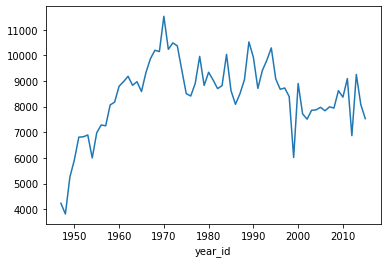

In [123]:
#Visualize how many points the Knicks scored throughout the seasons

nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

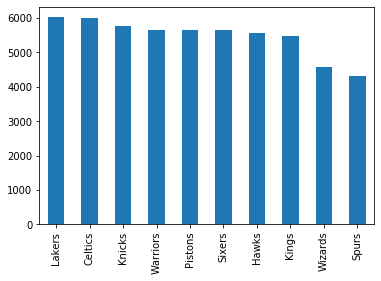

In [124]:
#create a bar plot to show the franchises with the most games played
nba["fran_id"].value_counts().head(10).plot(kind="bar")

## Question.11 (report your answer):

11.1) Explain what the above line plot, showing how many points the Knicks scored throughout the seasons, reveals to you (i.e. describe what you find out).

A) The line plot shows the sum of the points where the Knicks scored throught the season. The first season the sum of total points is above 4000. And the next season it got decreased and then it was increasing. In the year 1970 the total above of all points crossed 11000 points which is the highest compared to all the season points. And then on an average they have scored nearly 8000 points for all the seasons. And from after the peak high, they were at their lowest points in the year 2000 and 2010

11.2) Describe what the above bar plot reveals to you about the franchises with the most games played

A) The Lakers are sightly leading the Celtics with nealy 6000 games. And, there are six other teams which has more than 5000 games played.

11.3) In 2013, the Miami Heat won the championship. Create a pie plot showing the count of their wins and losses during that season. (First, define a criteria to include only the Heat’s games from 2013. Then, create a plot in the same way as you’ve seen above).

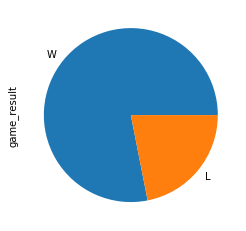

In [126]:
nba[
    (nba["fran_id"] == "Heat") &
    (nba["year_id"] == 2013)]["game_result"].value_counts().plot(kind="pie")